In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import urllib.request
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR, SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

In [10]:
data_path = 'https://raw.githubusercontent.com/Slimcent/Machine_Learning_Files/main/ML/housing.csv'

def download_read_data(path):
    
    """
     Function to retrieve data from the data paths
     And to read the data as a pandas dataframe
  
    To return the dataframe
    """ 
    
      ## Only retrieve the directory of the data

    data_path =  urllib.request.urlretrieve(path)[0]
    data = pd.read_csv(path)
    
    return data

In [11]:
cal_data = download_read_data(data_path)
cal_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
len(cal_data)

Exploratory Analysis

In [12]:
train_data, test_data = train_test_split(cal_data, test_size=0.1,random_state=20)

print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(train_data), len(test_data)))

The size of training data is: 18576 
The size of testing data is: 2064


In [13]:
# Checking statistics

train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,18576.0,-119.567530,2.000581,-124.3500,-121.7900,-118.4900,-118.010000,-114.4900
latitude,18576.0,35.630217,2.133260,32.5400,33.9300,34.2600,37.710000,41.9500
housing_median_age,18576.0,28.661068,12.604039,1.0000,18.0000,29.0000,37.000000,52.0000
total_rooms,18576.0,2631.567453,2169.467450,2.0000,1445.0000,2127.0000,3149.000000,39320.0000
total_bedrooms,18390.0,537.344698,417.672864,1.0000,295.0000,435.0000,648.000000,6445.0000
population,18576.0,1422.408376,1105.486111,3.0000,785.7500,1166.0000,1725.000000,28566.0000
households,18576.0,499.277078,379.473497,1.0000,279.0000,410.0000,606.000000,6082.0000
median_income,18576.0,3.870053,1.900225,0.4999,2.5643,3.5341,4.742725,15.0001
median_house_value,18576.0,206881.011305,115237.605962,14999.0000,120000.0000,179800.0000,264700.000000,500001.0000


In [16]:
## Checking missing values

train_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        186
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [14]:
# Checking Values in the Categorical Feature(s)

train_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     8231
INLAND        5896
NEAR OCEAN    2384
NEAR BAY      2061
ISLAND           4
Name: count, dtype: int64

<Axes: xlabel='ocean_proximity', ylabel='count'>

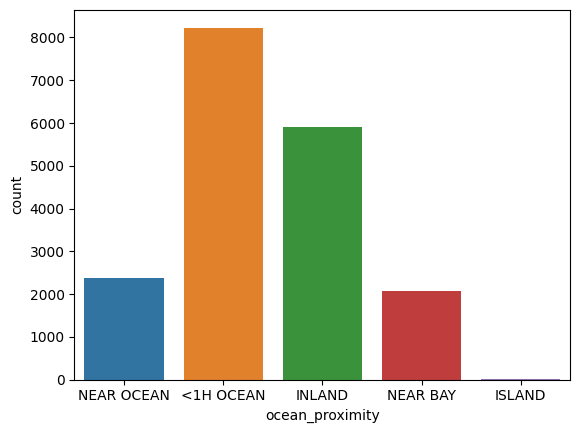

In [15]:
sns.countplot(data=train_data, x='ocean_proximity')

<Axes: ylabel='Frequency'>

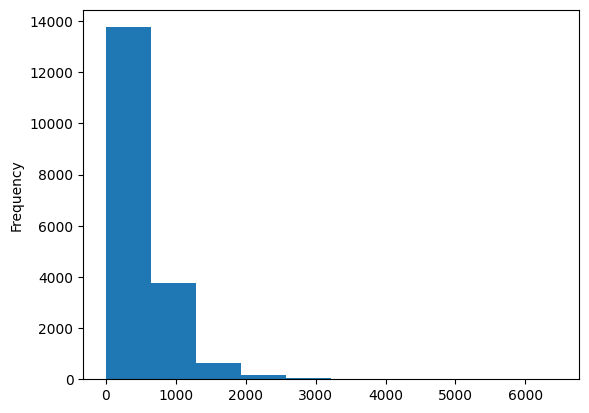

In [17]:
train_data['total_bedrooms'].plot(kind='hist')